In [55]:
# importing the necessery lbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from nltk.corpus import stopwords
from gensim import models,matutils
from nltk import word_tokenize, pos_tag

In [2]:
import re

In [3]:
train=pd.read_csv("reviews.csv")

In [4]:
# displaying the first 5 rows
train.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [5]:
# extraing the all the words from the un cleaned data
unclean_word=train["Review"].str

In [6]:
text=' '.join(rev for rev in train["Review"])

In [9]:
# creating the word cloud
from wordcloud import WordCloud,STOPWORDS
s={"course","courses","machine learing","coursera","python"}
STOPWORDS=STOPWORDS.union(s)

(-0.5, 399.5, 199.5, -0.5)

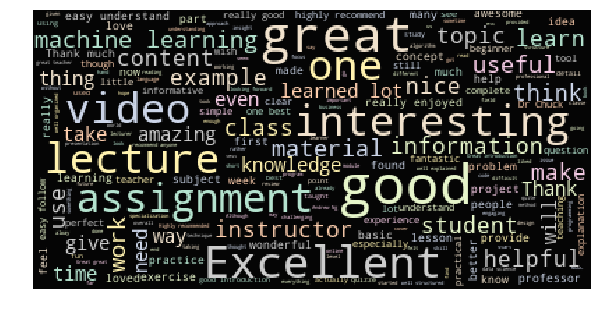

In [10]:
# Frequent words in the dataset with out cleaning it
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="black", max_words=1000,stopwords=STOPWORDS, max_font_size= 40)
wc.generate(text)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

In [12]:
#creating the stopwords
stop_words=stopwords.words("english")
adds_stopwords=["course","courses","machine learing","coursera","python"]

In [13]:
# addding the stopwords in to the list of the stopwords
for i in adds_stopwords:
    stop_words.append(i)

In [14]:
# Lemmitization to the dataset
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [56]:
# clean the corpus with the pos_tags
def CCleaning_corpus(data):
    # Remove the any puctuations,urls,numbers
    sentences=[]
    for text in data:
        text=text.lower()
        text=re.sub(r'[^a-z ]','',text)
        text=re.sub(r'\b[a-zA-Z]{2}\b','',text)
        text=re.sub(r'\b[a-zA-Z]{1}\b','',text)
        text=re.sub(r'\b[a-zA-Z]{3}\b','',text)
        text=re.sub(r'\  ',' ',text)
        # Tokinize the sentence and remove the stopwords
        tokens=text.split()
        sent=[]
        for word in tokens:
            if(word not in stop_words):
                a=[word]
                if(pos_tag(a)[0][1]=='NN' or pos_tag(a)[0][1]=="JJ"):
                    #lemmitize the words in the dataset
                    sent.append(lemm.lemmatize(word))
        # creating the dataset seperatly
        s=" ".join(sent)
        
        sentences.append(s)
    return sentences

In [16]:
# cleaning the data without pos-tag 
def Cleaning(data):
    # Remove the any puctuations,urls,numbers
    sentences=[]
    for text in data:
        text=text.lower()
        text=re.sub(r'[^a-z ]','',text)
        text=re.sub(r'\b[a-zA-Z]{2}\b','',text)
        text=re.sub(r'\b[a-zA-Z]{1}\b','',text)
        text=re.sub(r'\b[a-zA-Z]{3}\b','',text)
        text=re.sub(r'\  ',' ',text)
        # Tokinize the sentence and remove the stopwords
        tokens=text.split()
        sent=[]
        for word in tokens:
            if(word not in stop_words):
                sent.append(lemm.lemmatize(word))
        s=" ".join(sent)
        
        sentences.append(s)
    return sentences

In [17]:
def Lemmitization(data):
    sentence=[]
    for text in data:
        t=str(text).split()
        sent=[]
        for word in t:
            sent.append(lemm.lemmatize(word))
        s=" ".join(sent)
        sentence.append(s)
    return sentence
            

In [18]:
# Now importing the dataset which is already preprocessed
preprocess_data=pd.read_csv("Preprocessed_data.csv")

In [19]:
# displaying the preprocesssed data
preprocess_data["Review"]=preprocess_data["good"]

In [20]:
preprocess_data.drop(columns=["good","0"],inplace=True)

In [21]:
col=Lemmitization(preprocess_data["Review"])

In [22]:
preprocess_data["Review"][0].split()

['class', 'helpful', 'class', 'basic', 'music', 'knowledge']

In [23]:
preprocess_data["Review"]=col

In [24]:
# displaying the dataset in the preprocessed the data
preprocess_data.head()

,Review
0,class helpful class basic music knowledge
1,likeprof helpful discussion active experience
2,easy basic important sketchup
3,nice teacheri point eazliy
4,great recommend business


(-0.5, 399.5, 199.5, -0.5)

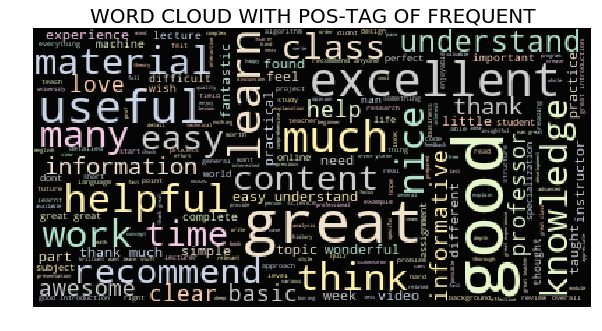

In [25]:
# Forming the word cloud with the cleadned dataset
text_1=" ".join(word for word in preprocess_data["Review"])
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="black", max_words=1000,stopwords=STOPWORDS, max_font_size= 50)
wc.generate(text_1)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.title("WORD CLOUD WITH POS-TAG OF FREQUENT",fontsize=20)
plt.axis('off')

### Creating the dataset with out pos-tags

In [27]:
col_1=Cleaning(train["Review"][1:])

In [28]:
# datasets with out filter the pos-tags
pos_data=pd.DataFrame()
pos_data["Review"]=col_1

In [29]:
# dispaying the daset
pos_data.head()

,Review
0,class helpful currently still learning class m...
1,likeprof helpful discussion among student quit...
2,easy follow includes basic important technique...
3,really nice teacheri could point eazliy
4,great recommend especially business manager


(-0.5, 399.5, 199.5, -0.5)

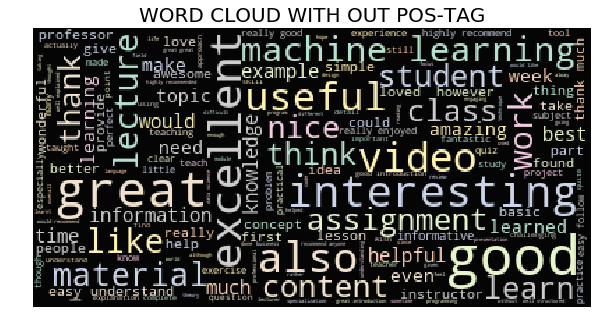

In [51]:
# creating the word cloud with out the pos-tags
text_2=" ".join(word for word in pos_data["Review"])
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="black", max_words=1000,stopwords=stop_words, max_font_size= 40)
wc.generate(text_2)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.title("WORD CLOUD WITH OUT POS-TAG",fontsize=20)
plt.axis('off')

### Forming the vectorizer with Term freaquency vectorizer - inverse document vectorizer

In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [74]:
# forming the vectorizer with tf and idf vectorizer
vectorizer=TfidfVectorizer(max_features=2000,max_df=0.95,min_df=2,decode_error='ignore',ngram_range=(1,2))
doc_term_mat=vectorizer.fit_transform(preprocess_data["Review"])

In [95]:
vectorizer1=CountVectorizer(max_features=2000,max_df=0.95,min_df=2,decode_error='ignore')
count_dtm=vectorizer1.fit_transform(preprocess_data["Review"])

In [96]:
vectorizer.vocabulary_

{'class': 226,
 'helpful': 876,
 'basic': 123,
 'music': 1236,
 'knowledge': 1030,
 'discussion': 434,
 'active': 23,
 'experience': 585,
 'easy': 467,
 'important': 917,
 'nice': 1259,
 'point': 1370,
 'great': 769,
 'recommend': 1498,
 'business': 176,
 'great recommend': 819,
 'useful': 1891,
 'management': 1132,
 'disappointed': 429,
 'name': 1238,
 'good': 695,
 'introduction': 992,
 'overview': 1310,
 'little': 1099,
 'digital': 424,
 'content': 310,
 'single': 1627,
 'short': 1606,
 'lecture': 1072,
 'treatment': 1846,
 'superficial': 1733,
 'indepth': 930,
 'material': 1149,
 'available': 100,
 'website': 1945,
 'example': 541,
 'good introduction': 718,
 'super': 1731,
 'excellent': 545,
 'coursera': 339,
 'information': 937,
 'technology': 1775,
 'reason': 1492,
 'unique': 1879,
 'high': 885,
 'level': 1081,
 'analysis': 51,
 'wide': 1958,
 'range': 1473,
 'cover': 348,
 'detailed': 405,
 'high level': 886,
 'wide range': 1959,
 'technical': 1773,
 'company': 271,
 'learn': 1

### Plotting the frequntly occuring words 

In [97]:
count_vec = np.asarray(count_dtm.sum(axis=0)).ravel()
count_tf=np.asarray(doc_term_mat.sum(axis=0)).ravel()

In [98]:
cnt_features=vectorizer.get_feature_names()
tf_features=vectorizer1.get_feature_names()

In [99]:
cnt_dict=list(zip(cnt_features,count_vec))
tf_dict=list(zip(tf_features,count_dtm))

In [100]:
x, y = (list(x) for x in zip(*sorted(cnt_dict, key=lambda x: x[1], reverse=True)))

In [101]:
# plotting the fraqent key words in the data
plott=pd.DataFrame()
plott["xx"]=x[0:20]
plott["yy"]=y[0:20]

Text(0.5,1,'Frequent words in the Dataset')

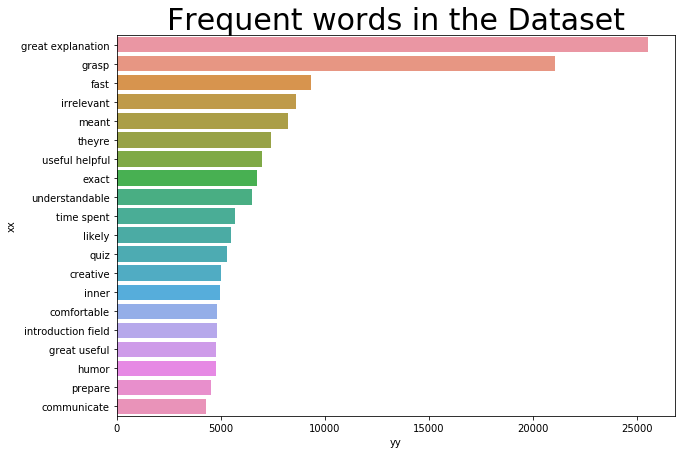

In [102]:
plt.figure(figsize=(10,7))
sbn.barplot(data=plott,y="xx",x="yy")
plt.title("Frequent words in the Dataset",fontsize=30)


In [103]:
plott

,xx,yy
0,great explanation,25528
1,grasp,21062
2,fast,9328
3,irrelevant,8609
4,meant,8209
5,theyre,7416
6,useful helpful,6961
7,exact,6750
8,understandable,6475
9,time spent,5688


In [104]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [105]:
lda = LatentDirichletAllocation(n_components=5, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [106]:
lda.fit(count_dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=5, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [107]:
doc_topic = lda.transform(count_dtm)

In [108]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print("-------------------------------------")
        print("  ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))                        

    print()

In [109]:
n_top_words=20
print("\nTopics in LDA model:")
tf_feature_names = cnt_features

print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0:
-------------------------------------
time spent  learn material  thoughtful  lengthy  great understand  language  primer  awesome  michael  work hard  staff  content  entry level  great nice  fresh  efficiency  normal  complete  keen  introduction subject
Topic #1:
-------------------------------------
great explanation  fast  great useful  professor excellent  quiz  figure  comfortable  kinda  worth  inner  approachable  punctuation  wonderful teacher  information help  score  cognition  support  fabulous  introduction field  story
Topic #2:
-------------------------------------
meant  theyre  deeply  basic knowledge  water  good insight  prepare  text book  comfortable  pragmatic  place start  much thank  wonderful class  aspect  supplemental  update  creative  professor great  economic  handy
Topic #3:
-------------------------------------
grasp  irrelevant  useful helpful  exact  understandable  minute  memory  incredible  learn good  beginner  inne

In [90]:
lda.components_.shape

(5, 2000)

### Testing with the Real examples

In [126]:
ex_text=["has some wonderful assignment"]
Testing(ex_text)

doc: 0 topic: 1



In [69]:
def Testing(ex_text):
    ex_text=CCleaning_corpus(ex_text)
    ex_vect=vectorizer1.transform(ex_text)
    doc_topic=lda.transform(ex_vect)
    for n in range(doc_topic.shape[0]):
        topic_most_pr = doc_topic[n].argmax()
        print("doc: {} topic: {}\n".format(n,topic_most_pr))